In [2]:
from keras import layers
import warnings
import warnings
warnings.filterwarnings(action='ignore')

layer = layers.Dense(32, input_shape=(784, ))

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

In [6]:
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0]

1

In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다.
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# 리뷰를 디코딩합니다. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듭니다.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환합니다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환합니다.

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 123ms/step - loss: 0.5388 - accuracy: 0.7833 - val_loss: 0.4237 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3422 - accuracy: 0.8991 - val_loss: 0.3344 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2522 - accuracy: 0.9230 - val_loss: 0.2921 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1972 - accuracy: 0.9391 - val_loss: 0.2885 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1607 - accuracy: 0.9501 - val_loss: 0.2864 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1319 - accuracy: 0.9602 - val_loss: 0.2822 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1109 - accuracy: 0.9655 - val_loss: 0.2977 - val_accuracy: 0.8831
Epoch 8/20
3

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

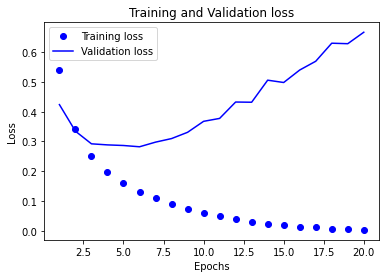

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미합니다.
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

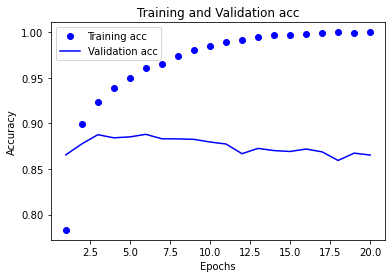

In [23]:
plt.clf() # 그래프를 초기화 합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') # 'bo'는 파란색 점을 의미합니다.
plt.plot(epochs, val_acc, 'b', label='Validation acc') # 'b'는 파란색 실선을 의미합니다.
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4528 - accuracy: 0.8212
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2598 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2009 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 0.8784


In [25]:
results

[0.3097880184650421, 0.8784400224685669]

In [26]:
model.predict(x_test)

array([[0.2974943 ],
       [0.99972594],
       [0.9704348 ],
       ...,
       [0.21756738],
       [0.1225543 ],
       [0.78018856]], dtype=float32)

In [27]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1482 - accuracy: 0.8184 0s - loss: 0.1805 - 
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0813 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0611 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0865 - accuracy: 0.8839


In [28]:
results

[0.08654766529798508, 0.8839200139045715]

In [29]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

In [32]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [34]:
train_labels[10]

3

In [36]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data)  # 데스트 데이터 벡터 변환

In [37]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [38]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [41]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [44]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 45ms/step - loss: 2.6111 - accuracy: 0.5259 - val_loss: 1.6898 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.4003 - accuracy: 0.6909 - val_loss: 1.3126 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.0576 - accuracy: 0.7647 - val_loss: 1.1528 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8375 - accuracy: 0.8158 - val_loss: 1.0490 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6615 - accuracy: 0.8599 - val_loss: 0.9785 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5328 - accuracy: 0.8896 - val_loss: 0.9289 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4227 - accuracy: 0.9139 - val_loss: 0.9590 - val_accuracy: 0.7950
Epoch 8/20
16

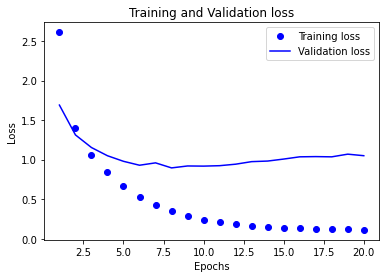

In [45]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미합니다.
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

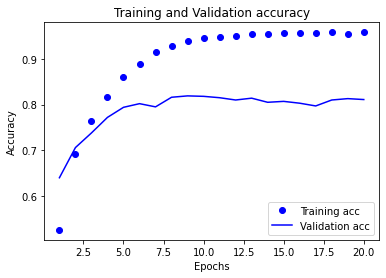

In [46]:
plt.clf() # 그래프를 초기화 합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') # 'bo'는 파란색 점을 의미합니다.
plt.plot(epochs, val_acc, 'b', label='Validation acc') # 'b'는 파란색 실선을 의미합니다.
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.6699 - accuracy: 0.5179 - val_loss: 1.7726 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.4600 - accuracy: 0.7056 - val_loss: 1.3283 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 0s 29ms/step - loss: 1.0785 - accuracy: 0.7783 - val_loss: 1.1458 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.8447 - accuracy: 0.8251 - val_loss: 1.0528 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.6739 - accuracy: 0.8581 - val_loss: 0.9687 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 30ms/step - loss: 0.5386 - accuracy: 0.8877 - val_loss: 0.9534 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.4323 - accuracy: 0.9082 - val_loss: 0.9079 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [49]:
results

[0.9720510244369507, 0.7898486256599426]

In [50]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18788958147818344

In [51]:
predictions = model.predict(x_test)

In [52]:
predictions[0].shape

(46,)

In [53]:
np.sum(predictions[0])

0.9999998

In [54]:
np.argmax(predictions[0])

3

In [55]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [56]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.7335 - accuracy: 0.4684 - val_loss: 1.7274 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.4462 - accuracy: 0.6869 - val_loss: 1.2900 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.0851 - accuracy: 0.7578 - val_loss: 1.1397 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8664 - accuracy: 0.8079 - val_loss: 1.0977 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.8450 - val_loss: 1.0117 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5631 - accuracy: 0.8753 - val_loss: 0.9633 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4501 - accuracy: 0.9017 - val_loss: 0.9723 - val_accuracy: 0.8040
Epoch 8/20
16

In [67]:
results

[1.3367606401443481, 0.7738201022148132]

In [68]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [69]:
train_data.shape

(404, 13)

In [70]:
test_data.shape

(102, 13)

In [71]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [72]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [102]:
# 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다.
def bulid_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
# model.compile ( 'sgd', metrics= [tf.keras.metrics.meanabsoluteerror ()])
# model.compile ( 'sgd', metrics= [ 'mean_absolute_error'])
    return model

In [77]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    #훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                           train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = bulid_model() # 케라스 모델 구성(컴파일 포함)
    # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # 검증 세트로 모델 평가
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [78]:
all_scores

[2.413877010345459, 2.7038540840148926, 2.4943673610687256, 2.3667712211608887]

In [79]:
np.mean(all_scores)

2.4947174191474915

In [108]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    #훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                           train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = bulid_model() # 케라스 모델 구성(컴파일 포함)
    # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [109]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

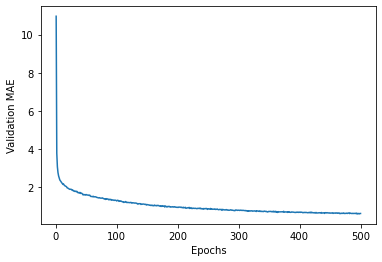

In [110]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

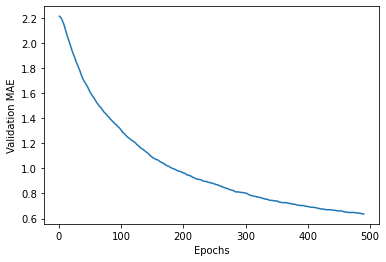

In [111]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10: ])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [113]:
model = bulid_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 779us/step - loss: 17.5884 - mean_absolute_error: 2.6333


In [114]:
test_mae_score

2.6333043575286865